# Data Science And Business Analyst Intern November Batch 2022

Task 2 completed By : Daniyal Ali Israil

Task:2 From the given 'Iris' dataset, predict the optimum number of cluster and represent is visually.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
data_url = "C:\\Users\\ADVANCES--PC\\Downloads\\Iris.csv"
data=pd.read_csv(data_url)

# DISPLAY TOP 5 ROWS OF THE DATA SET

In [8]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# DISPLAY LAST 5 ROWS OF THE DATA SET

In [9]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# CHECK DATA TYPE OF EACH COLUMN


In [10]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# CHECK NULL VALUES IN THE DATA SET

In [11]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [12]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# SHAPE OF OUR DATA SET

In [13]:
data.shape

(150, 6)

# GET INFORMATION ABOUT DATA SET LIKE TOTAL NUMBER ROW ,COLUMNS DATA TYPES OF EACH COLUMNS AND MEMORY RECQUIRMENTS

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# UNIQUE VALUES OF DATA SET

In [17]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [18]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

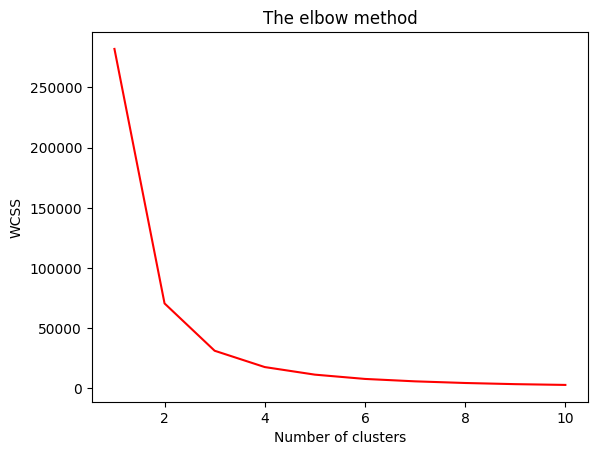

In [19]:
x = data.iloc[:, [0, 1, 2, 3,4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#  CREATING THE KMEANS CLASSIFIER

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
kmeans_fit = kmeans.fit(x)
kmean_pred=kmeans.predict(x)
print(kmean_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


# VISUALIZING THE CLUSTERS - ON THE FIRST TWO COLUMNS

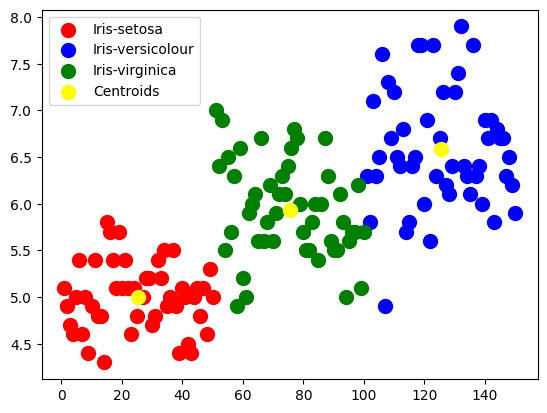

In [22]:
plt.scatter(x[kmean_pred == 0, 0], x[kmean_pred == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[kmean_pred == 1, 0], x[kmean_pred == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[kmean_pred == 2, 0], x[kmean_pred == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')


plt.legend()

# VISUALIZTION ON DIFFERENT COLUMNS

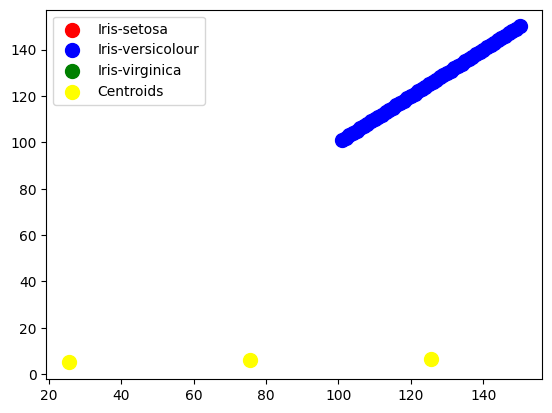

In [23]:
plt.scatter(x[kmean_pred == 3, 0], x[kmean_pred == 3, 0], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[kmean_pred == 1, 0], x[kmean_pred == 1, 0],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[kmean_pred == 4, 0], x[kmean_pred == 4, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')


plt.legend()